# Problem Statement:

A Company wants to automate the loan eligibility process based on customer details provided
while filling online application form. The details filled by the customer are Gender, Marital
Status, Education, Number of Dependents, Income of self and co applicant, Required Loan
Amount, Required Loan Term, Credit History and others.
The requirements are as follows:

1.Check eligibility of the Customer given the inputs described above.(Classification)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)


# Reading DataSet

In [2]:
df = pd.read_csv(r"C:\Ganesh\pandas datafile\CreditRisk.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
976,LP002971,Male,Yes,4.0,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
977,LP002975,Male,Yes,0.0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y
978,LP002980,Male,No,0.0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,Y
979,LP002986,Male,Yes,0.0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,N
980,LP002989,Male,No,0.0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,Y


In [5]:
df.shape

(981, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    float64
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 99.8+ KB


In [7]:
df=df.drop(['Loan_ID'],axis=1)   

In [8]:
df.corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Dependents,1.000000,0.137819,-0.003428,0.149586,-0.087534,-0.057913
ApplicantIncome,0.137819,1.000000,-0.114247,0.551811,-0.023089,0.023378
CoapplicantIncome,-0.003428,-0.114247,1.000000,0.179228,-0.043860,-0.027253
LoanAmount,0.149586,0.551811,0.179228,1.000000,0.055636,-0.008235
Loan_Amount_Term,-0.087534,-0.023089,-0.043860,0.055636,1.000000,-0.020439
Credit_History,-0.057913,0.023378,-0.027253,-0.008235,-0.020439,1.000000


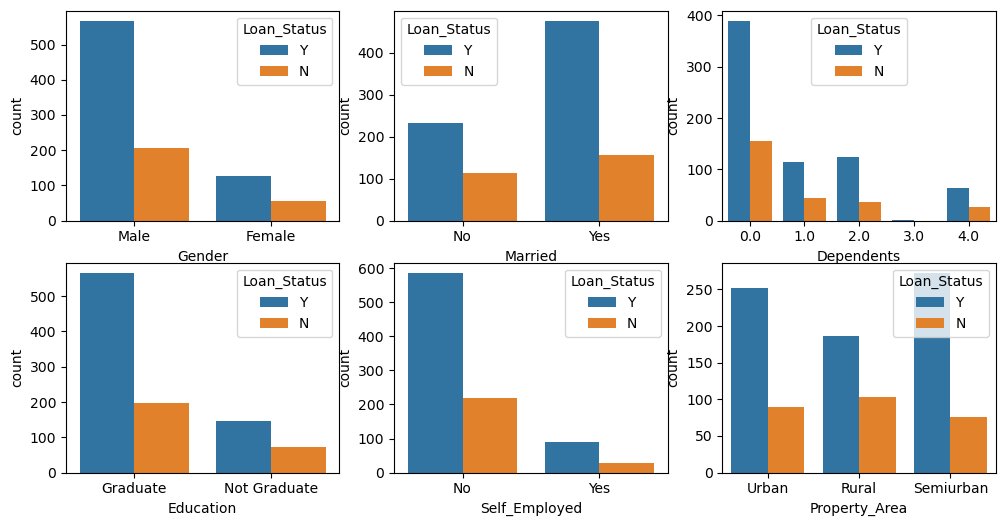

In [9]:
countplot_list = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area'];

plt.figure(figsize=(12,6))
x=1
for i in countplot_list:
    plt.subplot(2,3,x)
    sns.countplot(x=i, hue='Loan_Status',data= df)
    x=x+1

# Checking Null Values in Datasets

In [10]:
df.isnull().sum()[df.isnull().sum()>0]

Gender              24
Married              3
Dependents          25
Self_Employed       55
LoanAmount          27
Loan_Amount_Term    20
Credit_History      79
dtype: int64

In [11]:
# there some missing values present in the Columns

In [12]:
df.Gender.value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

In [13]:
df.Gender.mode()

0    Male
Name: Gender, dtype: object

In [14]:
df.Gender = df.Gender.fillna('Male')

In [15]:
df.Married.value_counts()

Yes    631
No     347
Name: Married, dtype: int64

In [16]:
df.Married.mode()

0    Yes
Name: Married, dtype: object

In [17]:
df.Married = df.Married.fillna('Yes')

In [18]:
df.Dependents.value_counts()

0.0    545
1.0    160
2.0    160
4.0     90
3.0      1
Name: Dependents, dtype: int64

In [19]:
df.Dependents.mean()

0.8817991631799164

In [20]:
df.Dependents=df.Dependents.fillna(df.Dependents.mean())

In [21]:
df.isnull().sum()[df.isnull().sum()>0]

Self_Employed       55
LoanAmount          27
Loan_Amount_Term    20
Credit_History      79
dtype: int64

In [22]:
df.Self_Employed.value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

In [23]:
df.Self_Employed.mode()

0    No
Name: Self_Employed, dtype: object

In [24]:
df.Self_Employed=df.Self_Employed.fillna('No')

In [25]:
df.LoanAmount.value_counts()

120.0    29
110.0    27
100.0    24
187.0    21
150.0    19
130.0    18
125.0    18
160.0    17
90.0     15
128.0    14
135.0    14
113.0    14
108.0    13
104.0    12
80.0     12
95.0     12
96.0     12
70.0     12
185.0    10
116.0    10
180.0    10
132.0    10
200.0    10
115.0    10
138.0    10
112.0     9
140.0     9
122.0     9
152.0     9
131.0     9
158.0     9
105.0     8
126.0     8
81.0      8
124.0     8
144.0     8
123.0     8
176.0     7
84.0      7
136.0     7
162.0     7
99.0      7
102.0     7
155.0     7
133.0     7
175.0     6
134.0     6
71.0      6
50.0      6
143.0     6
94.0      6
88.0      6
165.0     6
118.0     5
107.0     5
170.0     5
148.0     5
139.0     5
260.0     5
65.0      5
55.0      5
137.0     5
188.0     5
117.0     5
98.0      5
40.0      5
111.0     5
66.0      5
60.0      5
75.0      5
151.0     5
300.0     4
93.0      4
67.0      4
103.0     4
275.0     4
182.0     4
149.0     4
172.0     4
74.0      4
225.0     4
106.0     4
173.0     4
114.

In [26]:
df.LoanAmount.mean()

142.51153039832286

In [27]:
df.LoanAmount.median()

126.0

In [28]:
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())

In [29]:
df.Loan_Amount_Term.value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
60.0       3
36.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [30]:
df.Loan_Amount_Term.mean()

342.2018730489074

In [31]:
df.Loan_Amount_Term.median()

360.0

In [32]:
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean())

In [33]:
df.Credit_History.value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [34]:
df.Credit_History.mode()

0    1.0
Name: Credit_History, dtype: float64

In [35]:
df.Credit_History = df.Credit_History.fillna('1.0')

In [36]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [37]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

# # Convert Categorical Data Into Numric Data Using Label Encoder

In [38]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()


In [39]:
df.Gender = le.fit_transform(df.Gender)
df.Married = le.fit_transform(df.Married)
df.Education = le.fit_transform(df.Education)
df.Self_Employed = le.fit_transform (df.Self_Employed)
df.Property_Area = le.fit_transform(df.Property_Area)
df.Loan_Status = le.fit_transform(df.Loan_Status)


In [40]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,142.51153,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.00000,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.00000,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.00000,360.0,1.0,2,1


# Splitting Dataset into Train and Test Part

In [41]:

from sklearn.model_selection import train_test_split
  

df_train ,df_test = train_test_split(df , test_size = .2)
 
 
# max size is .3 test size is lesser model will be best

In [42]:
df_train_x =df_train.iloc[  : ,0:-1]
df_train_y=df_train.iloc[  : ,-1]





df_test_x =df_test.iloc[  : ,0:-1]
df_test_y=df_test.iloc[  : ,-1]

In [43]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(df_train_x , df_train_y)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
pred = logreg.predict (df_test_x)

In [45]:
len(pred)

197

In [46]:
gt = pd.DataFrame()
gt['actual'] = df_test_y
gt['predicted'] = pred

In [47]:
gt

,actual,predicted
684,1,1
853,0,1
223,1,1
419,1,1
569,0,0
523,1,1
391,1,1
873,0,1
582,1,1
729,1,1


In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score

In [49]:
logreg_Confusion =confusion_matrix(df_test_y ,pred)
logreg_Confusion

array([[ 30,  22],
       [  4, 141]], dtype=int64)

In [50]:
accuracy_logreg=accuracy_score(df_test_y ,pred) 
accuracy_logreg

0.868020304568528

In [51]:
precision_score(df_test_y ,pred)

0.8650306748466258

In [52]:
classification_report(df_test_y ,pred) 

'              precision    recall  f1-score   support\n\n           0       0.88      0.58      0.70        52\n           1       0.87      0.97      0.92       145\n\n    accuracy                           0.87       197\n   macro avg       0.87      0.77      0.81       197\nweighted avg       0.87      0.87      0.86       197\n'

# 2.Using Decision Tree Classifier Algorithm

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(df_train_x , df_train_y)


DecisionTreeClassifier()

In [54]:
pred_dt = dt.predict(df_test_x)

In [55]:
dt_Confusion =confusion_matrix(df_test_y ,pred_dt)
dt_Confusion

array([[ 38,  14],
       [ 19, 126]], dtype=int64)

In [56]:
accuracy_dt=accuracy_score(df_test_y ,pred_dt) 
accuracy_dt

0.8324873096446701

In [57]:
precision_score(df_test_y ,pred_dt)

0.9

In [58]:
dt_report =classification_report(df_test_y ,pred_dt) 
dt_report

'              precision    recall  f1-score   support\n\n           0       0.67      0.73      0.70        52\n           1       0.90      0.87      0.88       145\n\n    accuracy                           0.83       197\n   macro avg       0.78      0.80      0.79       197\nweighted avg       0.84      0.83      0.83       197\n'

# 3.Random Forest Classifier Algorithm

In [59]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

rfc.fit(df_train_x,df_train_y)


RandomForestClassifier()

In [60]:
pred_rfc = rfc.predict(df_test_x)

In [61]:
rfc_confusion = confusion_matrix(df_test_y,pred_rfc)
rfc_confusion

array([[ 30,  22],
       [  6, 139]], dtype=int64)

In [62]:
accuracy_rfc = accuracy_score(df_test_y,pred_rfc)
accuracy_rfc

0.8578680203045685

In [63]:
precision_rfc = precision_score(df_test_y,pred_rfc)
precision_rfc

0.8633540372670807

In [64]:
classification_report(df_test_y,pred_rfc)

'              precision    recall  f1-score   support\n\n           0       0.83      0.58      0.68        52\n           1       0.86      0.96      0.91       145\n\n    accuracy                           0.86       197\n   macro avg       0.85      0.77      0.80       197\nweighted avg       0.86      0.86      0.85       197\n'

# 4.Adaboost Classifier Algorithm

In [65]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(rfc)
abc.fit(df_train_x,df_train_y)

AdaBoostClassifier(base_estimator=RandomForestClassifier())

In [66]:
pred_abc =abc.predict(df_test_x)

In [67]:
abc_confusion = confusion_matrix(df_test_y,pred_abc)
abc_confusion

array([[ 30,  22],
       [  5, 140]], dtype=int64)

In [68]:
accuracy_abc = accuracy_score(df_test_y,pred_abc)
accuracy_abc

0.8629441624365483

In [69]:
precision_abc = precision_score(df_test_y,pred_abc)
precision_abc

0.8641975308641975

In [70]:
classification_report(df_test_y,pred_abc)

'              precision    recall  f1-score   support\n\n           0       0.86      0.58      0.69        52\n           1       0.86      0.97      0.91       145\n\n    accuracy                           0.86       197\n   macro avg       0.86      0.77      0.80       197\nweighted avg       0.86      0.86      0.85       197\n'

# 5.Using KNN Algorithm

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()

knc.fit(df_train_x,df_train_y)

KNeighborsClassifier()

In [72]:
pred_knc = knc.predict(df_test_x)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [73]:
confusion_knc = confusion_matrix(df_test_y,pred_knc)
confusion_knc

array([[  4,  48],
       [ 15, 130]], dtype=int64)

In [74]:
accuracy_knc = accuracy_score(df_test_y,pred_knc)
accuracy_knc

0.6802030456852792

In [75]:
precision_knc = precision_score(df_test_y,pred_knc)
precision_knc

0.7303370786516854

In [76]:
classification_report(df_test_y,pred_knc)

'              precision    recall  f1-score   support\n\n           0       0.21      0.08      0.11        52\n           1       0.73      0.90      0.80       145\n\n    accuracy                           0.68       197\n   macro avg       0.47      0.49      0.46       197\nweighted avg       0.59      0.68      0.62       197\n'

In [77]:
print(classification_report(df_test_y,pred_knc))

              precision    recall  f1-score   support

           0       0.21      0.08      0.11        52
           1       0.73      0.90      0.80       145

    accuracy                           0.68       197
   macro avg       0.47      0.49      0.46       197
weighted avg       0.59      0.68      0.62       197



In [78]:
Accuracyy_score = {
'accuracy_knc': accuracy_knc * 100,
'accuracy_abc' : accuracy_abc * 100,
'accuracy_rfc': accuracy_rfc * 100,
'accuracy_dt': accuracy_dt * 100,
'accuracy_logre': accuracy_logreg * 100}

Accuracyy_score

{'accuracy_knc': 68.02030456852792,
 'accuracy_abc': 86.29441624365482,
 'accuracy_rfc': 85.78680203045685,
 'accuracy_dt': 83.24873096446701,
 'accuracy_logre': 86.80203045685279}

In [79]:
Classification_Model = Accuracyy_score.keys()
Classification_Model

dict_keys(['accuracy_knc', 'accuracy_abc', 'accuracy_rfc', 'accuracy_dt', 'accuracy_logre'])

In [80]:
Accuracy = Accuracyy_score.values()
Accuracy

dict_values([68.02030456852792, 86.29441624365482, 85.78680203045685, 83.24873096446701, 86.80203045685279])

In [81]:
dff = pd.DataFrame()
dff['Accuracy'] = Accuracy
dff['Classification_Model'] =Classification_Model

dff

,Accuracy,Classification_Model
0,68.020305,accuracy_knc
1,86.294416,accuracy_abc
2,85.786802,accuracy_rfc
3,83.248731,accuracy_dt
4,86.802030,accuracy_logre


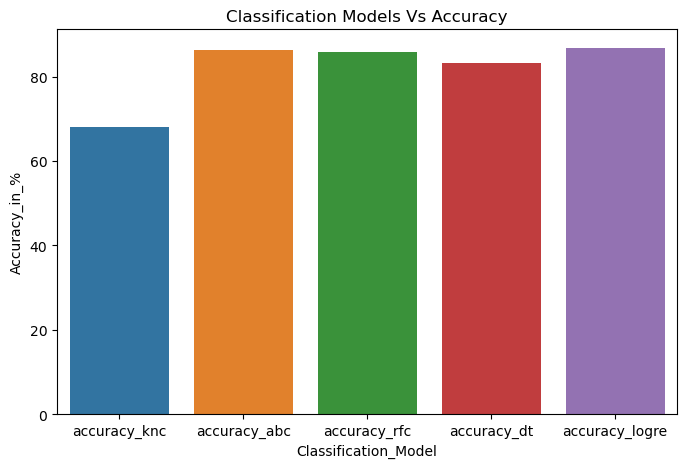

In [82]:
plt.figure(figsize=(8,5));
sns.barplot(x="Classification_Model",y="Accuracy",data=dff );
plt.title("Classification Models Vs Accuracy");
plt.ylabel('Accuracy_in_%');

In [83]:
from sklearn.model_selection import GridSearchCV   # hyper parameter
search_dict = { "criterion":['gini','entropy'],
               "max_depth" : range(3,10) ,
              'n_estimators':[2,5,10,15,20,25]}

grid = GridSearchCV(rfc , param_grid  = search_dict)
grid.fit(df_train_x , df_train_y)   # model has been build


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 10),
                         'n_estimators': [2, 5, 10, 15, 20, 25]})

In [84]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 20}

In [85]:
from sklearn.ensemble import RandomForestClassifier
rfc1=RandomForestClassifier(criterion='gini' , max_depth=8,n_estimators=10)

rfc1.fit(df_train_x,df_train_y)


RandomForestClassifier(max_depth=8, n_estimators=10)

In [86]:
pred_rfc = rfc.predict(df_test_x)


In [87]:
rfc_confusion1 = confusion_matrix(df_test_y,pred_rfc)
rfc_confusion1

array([[ 30,  22],
       [  6, 139]], dtype=int64)

In [88]:
accuracy_rfc1 = accuracy_score(df_test_y,pred_rfc)
accuracy_rfc1


0.8578680203045685

# Conclusion
 1.Random forest classifier is best alogirithm to find accurate predictions comparing to other model.
 
 
 2.Using GridSearchCV with random forest classifier model, we are able to achieve near about 81.5% accuracy